In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
import numpy as np


In [3]:
loan_df = pd.read_csv("loan_train_sampled.csv")
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,loan_status
0,6000,6000,6000.00000,36 months,10.59,B,B2,10,MORTGAGE,130000.0,...,751.93,0.0,0.0,0.0,Jan-13,3441.52,May-13,0,0,Fully Paid
1,14000,14000,13991.39746,36 months,19.82,G,G1,4,RENT,40000.0,...,4686.01,0.0,0.0,0.0,Jan-13,554.99,Dec-15,0,0,Fully Paid
2,15000,15000,14700.00000,36 months,11.14,B,B1,7,RENT,36700.0,...,1979.51,0.0,0.0,0.0,Mar-11,8616.51,May-16,0,0,Fully Paid
3,8000,8000,7775.00000,36 months,7.14,A,A3,10,RENT,126252.0,...,384.99,0.0,0.0,0.0,Apr-11,6409.52,Mar-16,0,0,Fully Paid
4,20500,12625,12625.00000,60 months,20.89,F,F1,9,MORTGAGE,54000.0,...,7502.09,0.0,0.0,0.0,Mar-16,88.58,Mar-16,0,0,Fully Paid


In [4]:
loan_df.shape

(16780, 39)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   16780 non-null  int64  
 1   funded_amnt                 16780 non-null  int64  
 2   funded_amnt_inv             16780 non-null  float64
 3   term                        16780 non-null  object 
 4   int_rate                    16780 non-null  float64
 5   grade                       16780 non-null  object 
 6   sub_grade                   16780 non-null  object 
 7   emp_length                  16780 non-null  int64  
 8   home_ownership              16780 non-null  object 
 9   annual_inc                  16780 non-null  float64
 10  verification_status         16780 non-null  object 
 11  issue_d                     16780 non-null  object 
 12  purpose                     16780 non-null  object 
 13  title                       167

In [6]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,16780.0,11097.749106,7273.057226,1000.00,5400.000000,9800.000000,15000.000000,35000.000000
funded_amnt,16780.0,10838.647735,7016.709581,1000.00,5325.000000,9600.000000,15000.000000,35000.000000
funded_amnt_inv,16780.0,10362.358440,6925.787448,0.00,5000.000000,8950.000000,14374.713900,35000.000000
int_rate,16780.0,12.521789,3.647799,5.42,10.000000,12.530000,15.050000,24.400000
emp_length,16780.0,5.036234,3.286796,1.00,2.000000,4.000000,8.000000,10.000000
annual_inc,16780.0,60282.821036,27316.525010,4000.00,40000.000000,55000.000000,76000.000000,141996.000000
dti,16780.0,13.795358,6.387046,0.00,9.030000,14.010000,18.820000,29.930000
delinq_2yrs,16780.0,0.130989,0.458160,0.00,0.000000,0.000000,0.000000,9.000000
inq_last_6mths,16780.0,0.838915,1.023113,0.00,0.000000,1.000000,1.000000,8.000000
open_acc,16780.0,9.090465,4.212095,2.00,6.000000,8.000000,11.000000,39.000000


In [7]:
loan_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [8]:
loan_df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'last_pymnt_d', 'last_credit_pull_d', 'loan_status'],
      dtype='object')

In [9]:
print(loan_df['term'].value_counts())
print('\n')
print('\n')

loan_df['term'] = loan_df['term'].apply(lambda term: int(term[:3]))

print(loan_df['term'].value_counts())

 36 months    11769
 60 months     5011
Name: term, dtype: int64




36    11769
60     5011
Name: term, dtype: int64


In [10]:
loan_df = loan_df.drop('grade', axis=1)


In [11]:
subgrade_dummies = pd.get_dummies(loan_df['sub_grade'],drop_first=True)
loan_df = pd.concat([loan_df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)


In [12]:
loan_df.shape

(16780, 71)

In [13]:
loan_df['home_ownership'] = loan_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(loan_df['home_ownership'],drop_first=True)
loan_df = loan_df.drop('home_ownership',axis=1)
loan_df = pd.concat([loan_df,dummies],axis=1)

In [14]:
loan_df.select_dtypes(['object']).columns

Index(['verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'loan_status'],
      dtype='object')

In [15]:
dummies = pd.get_dummies(loan_df[['verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' ]],drop_first=True)
loan_df = loan_df.drop(['verification_status', 'issue_d', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],axis=1)
loan_df = pd.concat([loan_df,dummies],axis=1)
loan_df.shape

(16780, 8174)

In [16]:
loan_fully_paid = sum(loan_df["loan_status"] == "Fully Paid")/len(loan_df)
loan_charged_off = sum(loan_df["loan_status"] == "Charged Off")/len(loan_df)

In [17]:
loan_fully_paid

0.5988081048867699

In [18]:
loan_charged_off

0.40119189511323006

In [19]:
loan_fullypaid = loan_df[loan_df['loan_status'] == "Fully Paid"].copy()
loan_chargedoff = loan_df[loan_df['loan_status'] == "Charged Off"].copy()

<ipython-input-20-2346aa339c2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_fullypaid["loan_amnt"], label='Fully Paid')
<ipython-input-20-2346aa339c2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_chargedoff["loan_amnt"], label='Charged Off')


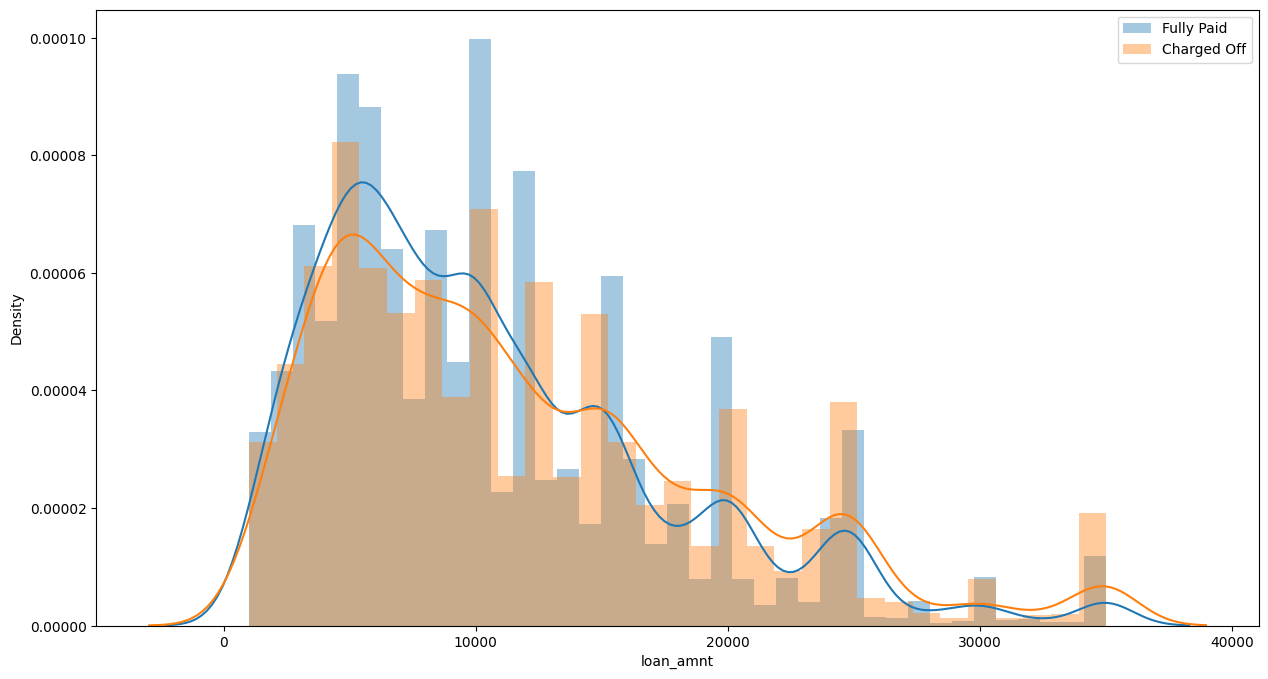

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(loan_fullypaid["loan_amnt"], label='Fully Paid')
sns.distplot(loan_chargedoff["loan_amnt"], label='Charged Off')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()


In [21]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import category_encoders as ce


In [23]:
from tensorflow.keras.utils import to_categorical
loan_df['loan_status'] = loan_df['loan_status'].replace(['Fully Paid'], 1)
loan_df['loan_status'] = loan_df['loan_status'].replace(['Charged Off'], 0)

Y = loan_df["loan_status"]
Y = np.asarray(Y).astype(np.float32)
X = loan_df.drop(columns=["loan_status"])


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [27]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [28]:
model = keras.Sequential()

# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping


In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)



In [31]:
model.fit(x=X_train,
          y=y_train,
          epochs=400,
          verbose = 2,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/400
53/53 - 2s - loss: 0.5848 - val_loss: 0.3989 - 2s/epoch - 46ms/step
Epoch 2/400
53/53 - 1s - loss: 0.3016 - val_loss: 0.2258 - 925ms/epoch - 17ms/step
Epoch 3/400
53/53 - 1s - loss: 0.1436 - val_loss: 0.1509 - 917ms/epoch - 17ms/step
Epoch 4/400
53/53 - 1s - loss: 0.0810 - val_loss: 0.1373 - 887ms/epoch - 17ms/step
Epoch 5/400
53/53 - 1s - loss: 0.0519 - val_loss: 0.1254 - 1s/epoch - 24ms/step
Epoch 6/400
53/53 - 1s - loss: 0.0363 - val_loss: 0.1321 - 1s/epoch - 22ms/step
Epoch 7/400
53/53 - 1s - loss: 0.0257 - val_loss: 0.1381 - 917ms/epoch - 17ms/step
Epoch 8/400
53/53 - 1s - loss: 0.0214 - val_loss: 0.1332 - 963ms/epoch - 18ms/step
Epoch 9/400
53/53 - 1s - loss: 0.0147 - val_loss: 0.1504 - 945ms/epoch - 18ms/step
Epoch 10/400
53/53 - 1s - loss: 0.0110 - val_loss: 0.1408 - 910ms/epoch - 17ms/step
Epoch 11/400
53/53 - 1s - loss: 0.0094 - val_loss: 0.1434 - 907ms/epoch - 17ms/step
Epoch 12/400
53/53 - 1s - loss: 0.0094 - val_loss: 0.1493 - 916ms/epoch - 17ms/step
Epoch 13/4

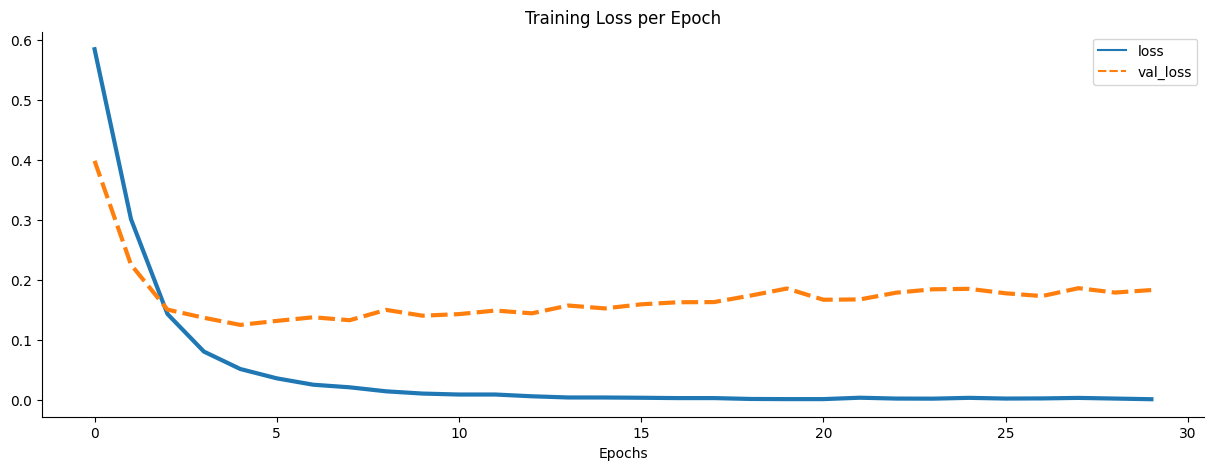

In [32]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [49]:
# categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# encoder = ce.OrdinalEncoder(cols=categorical_columns)
# X = encoder.fit_transform(X)

# encoder_label = ce.OrdinalEncoder(cols=["loan_status"])
# Y = encoder_label.fit_transform(Y)

In [51]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(y_test)


# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15102, 38), (1678, 38), (15102, 1), (1678, 1))

In [52]:
# sequential model
# ann_model = keras.Sequential()

# # adding dense layer
# ann_model.add(Dense(250, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# ann_model.add(Dropout(0.3))
# ann_model.add(Dense(500, activation='relu'))
# ann_model.add(Dropout(0.3))
# ann_model.add(Dense(500, activation='relu'))
# ann_model.add(Dropout(0.3))
# ann_model.add(Dense(500, activation='relu'))
# ann_model.add(Dropout(0.4))
# ann_model.add(Dense(250, activation='linear'))
# ann_model.add(Dropout(0.4))

# # adding dense layer with sigmoid activation/output layer
# ann_model.add(Dense(1, activation='sigmoid'))
# ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               9750      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

In [37]:
# # custom functions for f1, precision and recall

# from keras import backend as K

# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))




In [69]:
# ann_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[f1_m]) # metrics=['accuracy']


In [70]:
# history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)


Epoch 1/20
378/378 [==============================] - 8s 17ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 2/20
378/378 [==============================] - 5s 14ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 3/20
378/378 [==============================] - 6s 16ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 4/20
378/378 [==============================] - 6s 15ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 5/20
378/378 [==============================] - 5s 14ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 6/20
378/378 [==============================] - 6s 17ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 7/20
378/378 [==============================] - 7s 18ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 8/20
378/378 [==============================] - 7s 18ms/step - loss: nan - f1_m: nan - val_loss: nan - val_f1_m: nan
Epoch 9/20
378/3

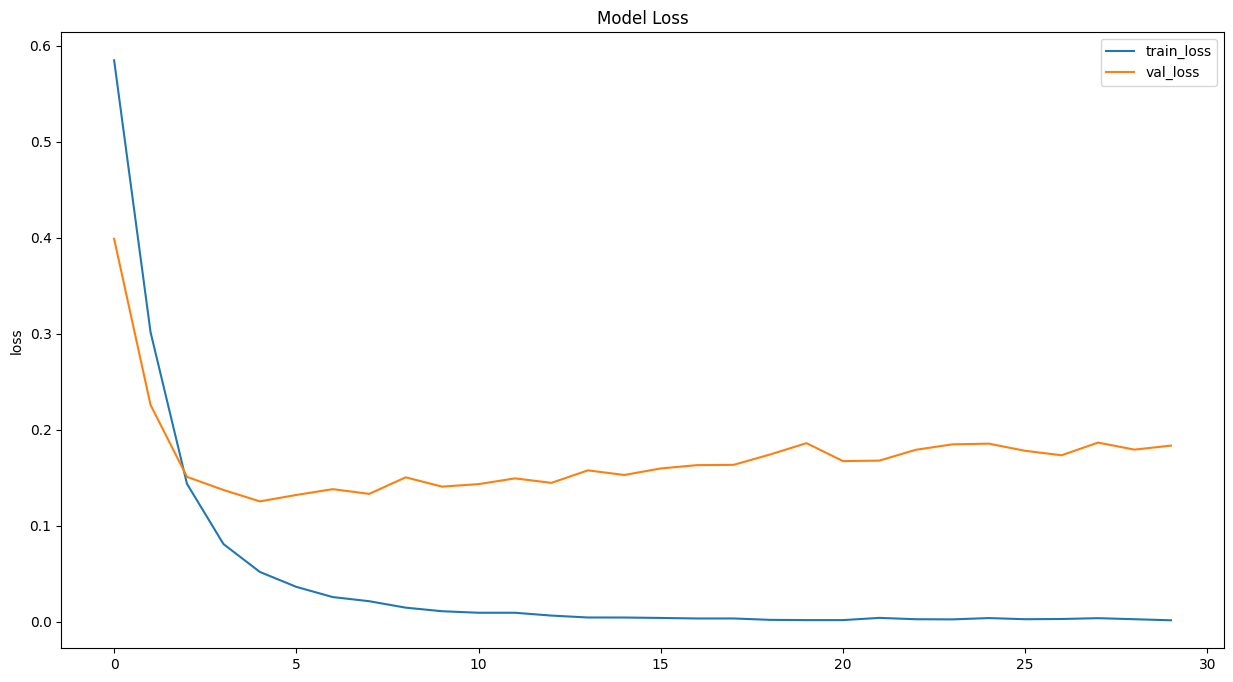

In [36]:
# Plot the model performance across epochs
# plt.figure(figsize=(15,8))
# plt.plot(model.history.history['loss'])
# plt.plot(model.history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('loss')
# plt.legend(['train_loss','val_loss'], loc = 'upper right')
# plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
# plt.show()